In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm 
import seaborn as sns

## KNN(K Nearest Neighbor)

### load data

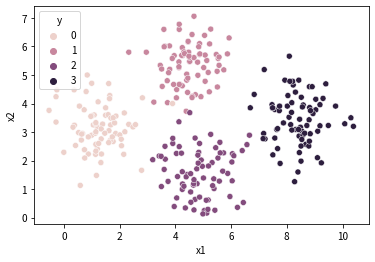

In [12]:
df = pd.read_csv("data7.csv",header=None)
df.columns = ["x1","x2","y"]

plt.figure(facecolor="white")
sns.scatterplot(x="x1",y="x2",hue="y",data=df)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [16]:
X = df[["x1","x2"]].to_numpy()
y = df["y"].to_numpy()

### learning

In [17]:
from sklearn.neighbors import KNeighborsClassifier

k = 12
model = KNeighborsClassifier(k,weights='distance')
model.fit(X,y)

KNeighborsClassifier(n_neighbors=12, weights='distance')

<ipython-input-24-2484ce23e923>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x_values, y_values, output, cmap=cm.Blues)


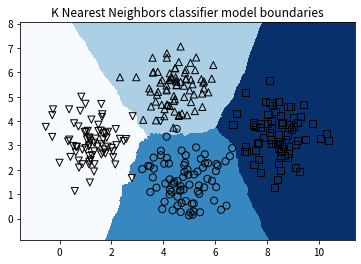

In [24]:
# 学習結果の可視化
step_size = 0.01  
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
x_values, y_values = np.meshgrid(np.arange(x_min, x_max, step_size), 
                                 np.arange(y_min, y_max, step_size))

output = model.predict(np.c_[x_values.ravel(), y_values.ravel()])

output = output.reshape(x_values.shape) 
marker_shapes = 'v^os'
plt.figure(facecolor="white") 
plt.pcolormesh(x_values, y_values, output, cmap=cm.Blues) 

for i in range(X.shape[0]): 
    plt.scatter(X[i, 0], X[i, 1], marker=marker_shapes[y[i]], 
                s=50, edgecolors='black', facecolors='none') 

plt.xlim(x_values.min(), x_values.max()) 
plt.ylim(y_values.min(), y_values.max()) 
plt.title('K Nearest Neighbors classifier model boundaries') 
plt.show()

### kを変化させたときの正解率の変化

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state=0)

In [42]:
acc_list = []
for k in range(1,105):
    model = KNeighborsClassifier(k,weights='distance')
    model.fit(X_train,y_train)
    
    y_pred_valid = model.predict(X_valid)
    acc_list.append(accuracy_score(y_valid,y_pred_valid))

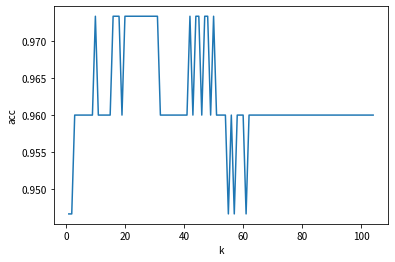

In [43]:
plt.figure(facecolor="white")
plt.plot(range(1,105),acc_list)
plt.xlabel("k")
plt.ylabel("acc")
plt.show()